In [6]:
using Pkg
Pkg.activate("../")

using Revise
using HiddenMarkovModel

 Activating environment at `~/GithubRepositories/HiddenMarkovModel/Project.toml`
┌ Info: Precompiling HiddenMarkovModel [7212e43c-49b6-4278-a2e6-573e0ac5bb2d]
└ @ Base loading.jl:1260


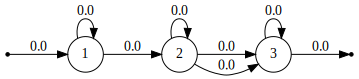

In [7]:
# This is a (fake) map between emissions indices.
# We replace the actual gmm by string.
emissionsidxs = Dict(
    "gmm1" => 1,
    "gmm2" => 2,
    "gmm3" => 3
)

g = Graph()

s1 = addstate!(g, State(1, emissionsidxs["gmm1"]))
s2 = addstate!(g, State(2, emissionsidxs["gmm2"]))
s3 = addstate!(g, State(3, emissionsidxs["gmm3"]))
link!(initstate(g), s1, 0.)
link!(s1, s1, 0.)
link!(s1, s2, 0.)
link!(s2, s2, 0.)
link!(s2, s3, 0.)
link!(s2, s3, 0.)
link!(s3, s3, 0.)
link!(s3, finalstate(g), 0.)

g 

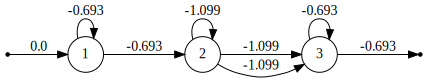

In [8]:
g = weightnormalize(g)

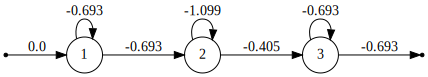

In [9]:
g = determinize(g)

In [59]:
llh = randn(3, 5) * 10

3×5 Array{Float64,2}:
 -8.53584  -3.59795   6.36407  -6.6721   -0.191504
 13.9877    5.96822  12.7367   18.2695    5.42444
  3.97152  16.8732   -3.94333  -7.96324   4.7519

In [60]:
lnαβ = αβrecursion(g, llh, pruning = nopruning)

3×5 Array{Float64,2}:
   0.0   -9.15825      -15.1279      -Inf           -Inf
 -Inf    -0.000105353   -2.69166e-7   -6.07159e-12  -Inf
 -Inf   -Inf           -42.1019      -25.8272         0.0

In [63]:
lnαβ = αβrecursion(g, llh, pruning = 1) # the higher the more pruning 

3×5 Array{Float64,2}:
   0.0   -9.15825      -Inf      -Inf           -Inf
 -Inf    -0.000105353    0.0      -6.07159e-12  -Inf
 -Inf   -Inf           -42.1018  -25.8272         0.0